In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_excel('flight_price-Copy1.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
df.shape

(10683, 11)

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

<Axes: xlabel='Price', ylabel='Count'>

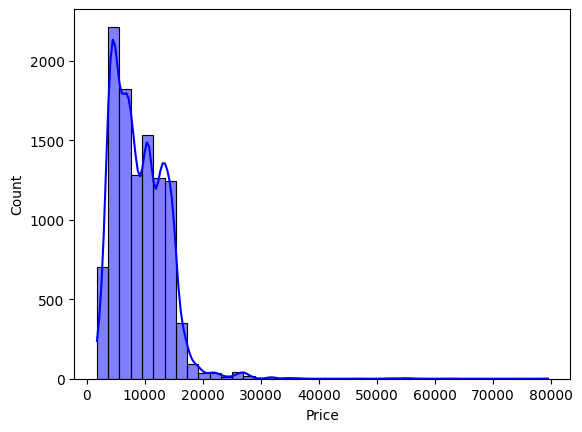

In [4]:
sns.histplot(df.Price,kde = True,bins=40,color='blue')

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
df.Price.describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

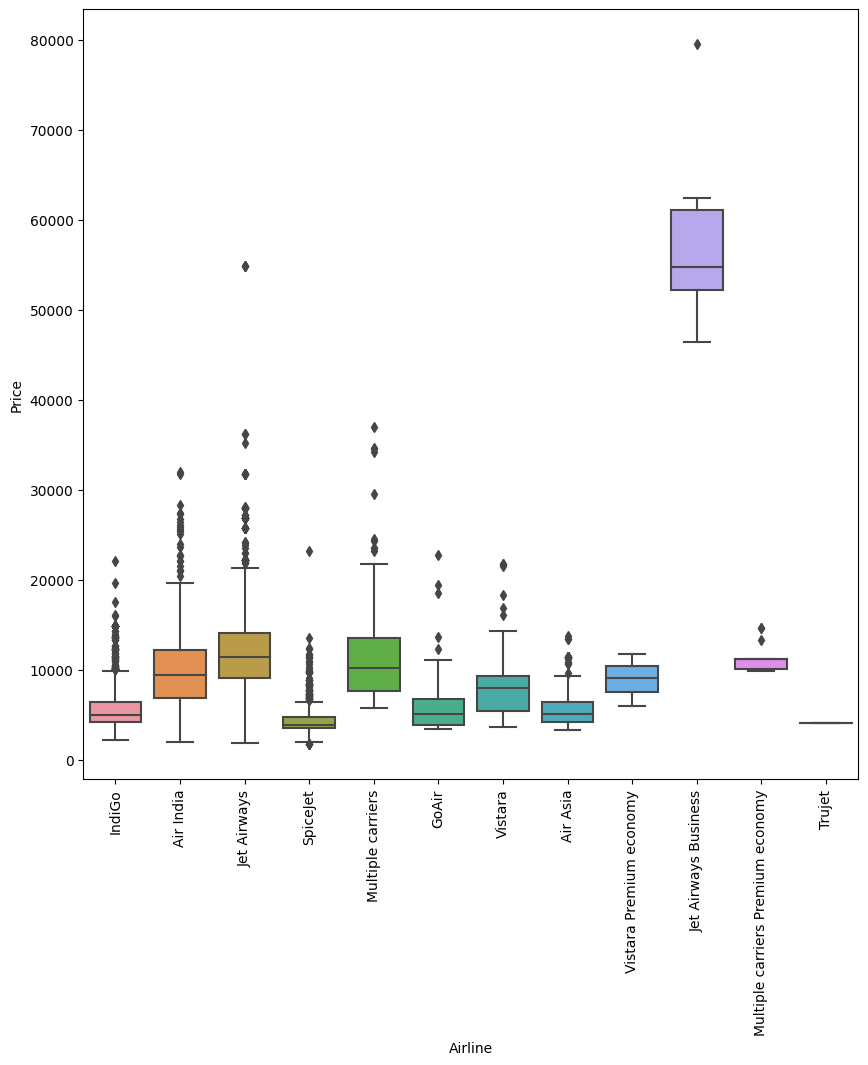

In [6]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df.Airline, y='Price', data=df)
plt.xticks(rotation=90)
plt.show()

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<Axes: >

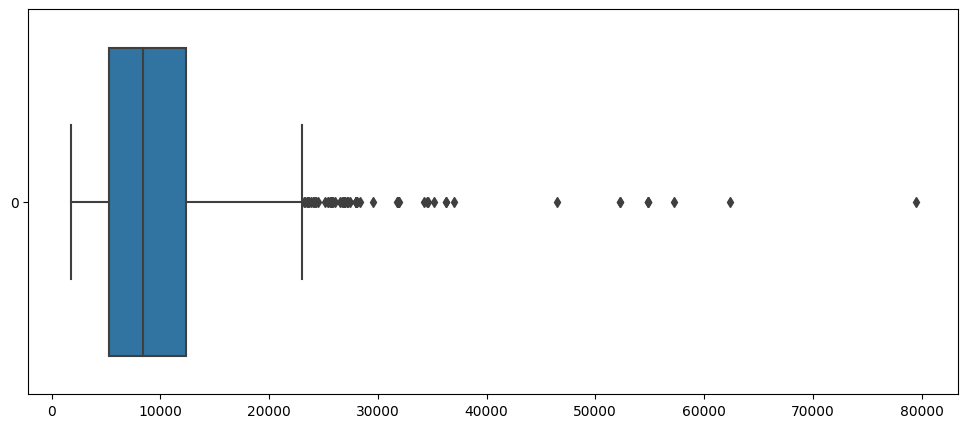

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(df.Price,orient="h")

In this dataset there are large number of outliers are present.
<br>Outliers can have a substantial impact on your analysis, it can cause of wrong enterpetation and estimation and it can also potentially leading to incorrect conclusions or models that do not generalize well.

#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price datasetto identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

Firstly i will prepare my datset to analysis, for finding peak travel season i analyse the count of flights month wise.

In [8]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

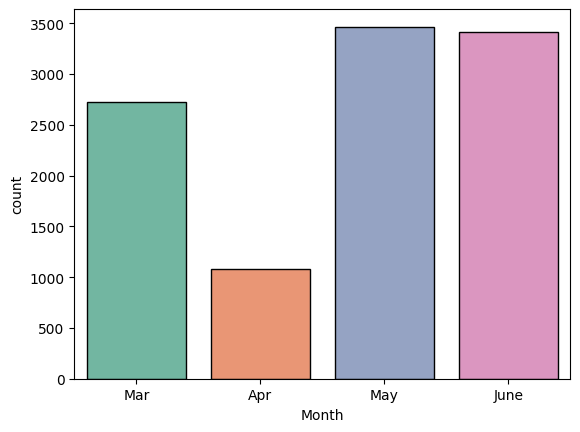

In [9]:
sns.countplot(x='Month',data= df,ec = 'black', palette= 'Set2')
plt.xticks([0,1,2,3],["Mar","Apr","May","June"])
plt.show()

<Axes: xlabel='Date', ylabel='count'>

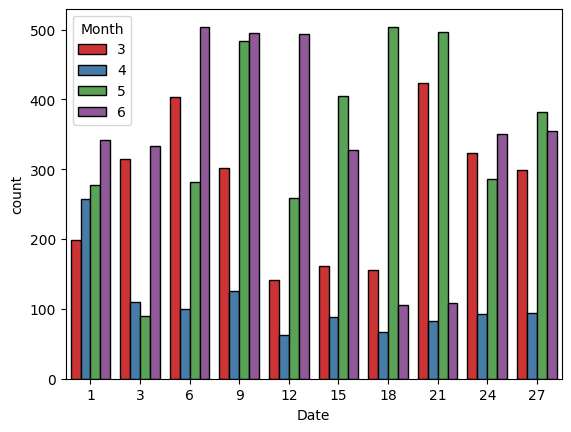

In [10]:
sns.countplot(x='Date',data= df,ec = 'black', hue="Month",palette= 'Set1')

In the month of may and june there are large no of flights, it's denote that in month of may and june people travel more by airlines. so we can predit that may and june is peak season of fligts.

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

In [11]:
df.Destination = df.Destination.str.replace("New Delhi","Delhi")
df.groupby(["Source","Destination"]).size().reset_index()

,Source,Destination,0
0,Banglore,Delhi,2197
1,Chennai,Kolkata,381
2,Delhi,Cochin,4537
3,Kolkata,Banglore,2871
4,Mumbai,Hyderabad,697


In [12]:
df1 = pd.DataFrame(df.Airline.value_counts()).reset_index()
df1

,Airline,count
0,Jet Airways,3849
1,IndiGo,2053
2,Air India,1752
3,Multiple carriers,1196
4,SpiceJet,818
5,Vistara,479
6,Air Asia,319
7,GoAir,194
8,Multiple carriers Premium economy,13
9,Jet Airways Business,6


In [13]:
df2 = df.groupby(["Airline","Total_Stops"]).Price.mean().reset_index()
df2

,Airline,Total_Stops,Price
0,Air Asia,1 stop,7078.325581
1,Air Asia,2 stops,6341.888889
2,Air Asia,non-stop,4492.331492
3,Air India,1 stop,9041.509259
4,Air India,2 stops,12092.779101
5,Air India,3 stops,12208.054054
6,Air India,4 stops,17686.000000
7,Air India,non-stop,5605.326139
8,GoAir,1 stop,6884.676471
9,GoAir,non-stop,4726.173913


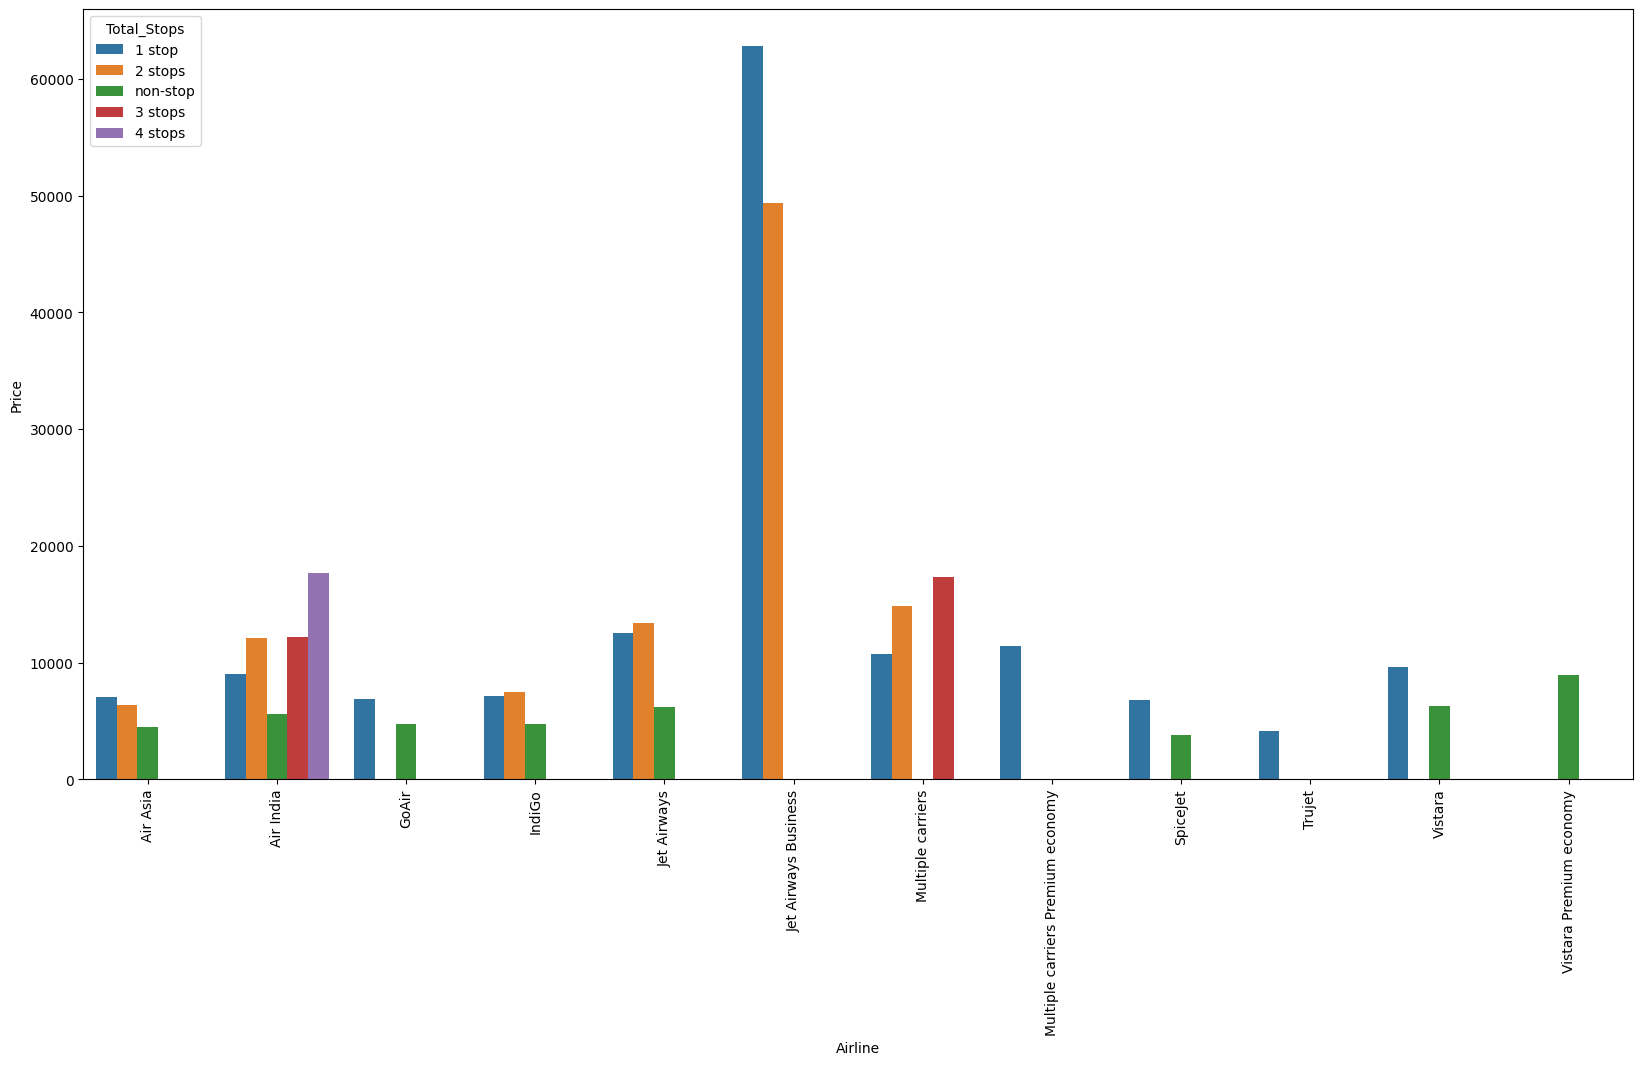

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(data = df2,x = "Airline",y= "Price",hue="Total_Stops")
plt.xticks(rotation=90)
plt.show()
# this graph give information about mean price of each airline with repect to total no of stops

In [15]:
df3 = df.groupby(["Source","Destination","Total_Stops"]).Price.mean().reset_index()
df3["Route"] = df3["Source"]+" to "+df3["Destination"]
df3

,Source,Destination,Total_Stops,Price,Route
0,Banglore,Delhi,1 stop,14016.540925,Banglore to Delhi
1,Banglore,Delhi,2 stops,13322.800000,Banglore to Delhi
2,Banglore,Delhi,3 stops,12761.000000,Banglore to Delhi
3,Banglore,Delhi,4 stops,17686.000000,Banglore to Delhi
4,Banglore,Delhi,non-stop,5561.114691,Banglore to Delhi
5,Chennai,Kolkata,non-stop,4789.892388,Chennai to Kolkata
6,Delhi,Cochin,1 stop,10030.822606,Delhi to Cochin
7,Delhi,Cochin,2 stops,12752.039533,Delhi to Cochin
8,Delhi,Cochin,3 stops,12939.840000,Delhi to Cochin
9,Delhi,Cochin,non-stop,6315.816901,Delhi to Cochin


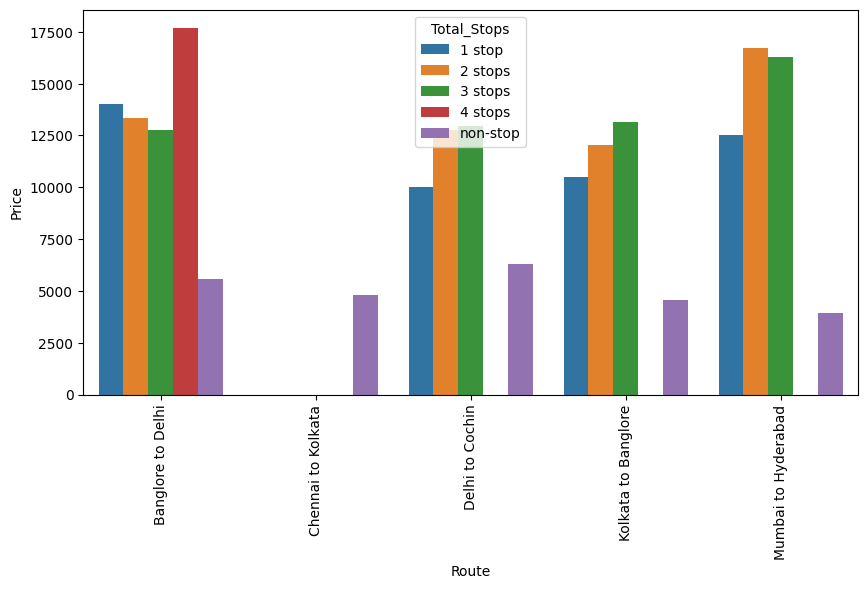

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data = df3,x = "Route",y= "Price",hue="Total_Stops")
plt.xticks(rotation = 90)
plt.show()
# this graph give information about mean price of each route with respect to total no of steops beweeen source to destination

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [17]:
# df = df.drop("Date_of_Journey",axis=1)
df["Route"] = df["Source"]+" to "+df["Destination"]
df = df.drop(["Source","Destination"],axis=1)
df.head()

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore to Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata to Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi to Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata to Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore to Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [18]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [19]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [20]:
# Because there are many no information data in additional information so we will drop this column
df = df.drop("Additional_Info",axis=1)
df

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore to Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,2019
1,Air India,1/05/2019,Kolkata to Banglore,05:50,13:15,7h 25m,2,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi to Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata to Banglore,18:05,23:30,5h 25m,1,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore to Delhi,16:50,21:35,4h 45m,1,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata to Banglore,19:55,22:25,2h 30m,0,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata to Banglore,20:45,23:20,2h 35m,0,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore to Delhi,08:20,11:20,3h,0,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore to Delhi,11:30,14:10,2h 40m,0,12648,1,3,2019


In [21]:
df["Duration_Hour"] = ((df['Duration'].str.split(' ').str[0].str.split('h').str[0]))
df["Duration_Min"] =df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.drop(6474,inplace=True)
df.reset_index(inplace=True, drop = True)
df[df.Duration_Hour == '5m']

df['Duration_Hour'] = df['Duration_Hour'].astype(int)
df['Duration_Min'].fillna(0,inplace = True)
df['Duration_Min'] = df['Duration_Min'].astype(int)
df["duration_in_Min"] = df['Duration_Hour']*60 + (df['Duration_Min'])
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Date,Month,Year,Duration_Hour,Duration_Min,duration_in_Min
0,IndiGo,24/03/2019,Banglore to Delhi,22:20,01:10 22 Mar,0,3897,24,3,2019,2,50,170
1,Air India,1/05/2019,Kolkata to Banglore,05:50,13:15,2,7662,1,5,2019,7,25,445
2,Jet Airways,9/06/2019,Delhi to Cochin,09:25,04:25 10 Jun,2,13882,9,6,2019,19,0,1140
3,IndiGo,12/05/2019,Kolkata to Banglore,18:05,23:30,1,6218,12,5,2019,5,25,325
4,IndiGo,01/03/2019,Banglore to Delhi,16:50,21:35,1,13302,1,3,2019,4,45,285


In [22]:
df = df.drop(["Dep_Time","Arrival_Time"],axis=1)
df

,Airline,Date_of_Journey,Route,Total_Stops,Price,Date,Month,Year,Duration_Hour,Duration_Min,duration_in_Min
0,IndiGo,24/03/2019,Banglore to Delhi,0,3897,24,3,2019,2,50,170
1,Air India,1/05/2019,Kolkata to Banglore,2,7662,1,5,2019,7,25,445
2,Jet Airways,9/06/2019,Delhi to Cochin,2,13882,9,6,2019,19,0,1140
3,IndiGo,12/05/2019,Kolkata to Banglore,1,6218,12,5,2019,5,25,325
4,IndiGo,01/03/2019,Banglore to Delhi,1,13302,1,3,2019,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata to Banglore,0,4107,9,4,2019,2,30,150
10678,Air India,27/04/2019,Kolkata to Banglore,0,4145,27,4,2019,2,35,155
10679,Jet Airways,27/04/2019,Banglore to Delhi,0,7229,27,4,2019,3,0,180
10680,Vistara,01/03/2019,Banglore to Delhi,0,12648,1,3,2019,2,40,160


In [23]:
dff = pd.get_dummies(df,columns=['Airline','Route'],dtype= int)
dff = dff.drop("Date_of_Journey",axis=1)
dff

,Total_Stops,Price,Date,Month,Year,Duration_Hour,Duration_Min,duration_in_Min,Airline_Air Asia,Airline_Air India,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Route_Banglore to Delhi,Route_Chennai to Kolkata,Route_Delhi to Cochin,Route_Kolkata to Banglore,Route_Mumbai to Hyderabad
0,0,3897,24,3,2019,2,50,170,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,2019,7,25,445,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,2019,19,0,1140,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6218,12,5,2019,5,25,325,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,2019,4,45,285,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,4107,9,4,2019,2,30,150,1,0,...,0,0,0,0,0,0,0,0,1,0
10678,0,4145,27,4,2019,2,35,155,0,1,...,0,0,0,0,0,0,0,0,1,0
10679,0,7229,27,4,2019,3,0,180,0,0,...,0,0,0,0,0,1,0,0,0,0
10680,0,12648,1,3,2019,2,40,160,0,0,...,0,0,0,1,0,1,0,0,0,0


In [24]:
dff.corr().Price

Total_Stops                                  0.603768
Price                                        1.000000
Date                                        -0.153619
Month                                       -0.103431
Year                                              NaN
Duration_Hour                                0.508985
Duration_Min                                -0.124673
duration_in_Min                              0.506695
Airline_Air Asia                            -0.133034
Airline_Air India                            0.049987
Airline_GoAir                               -0.095138
Airline_IndiGo                              -0.361025
Airline_Jet Airways                          0.416334
Airline_Jet Airways Business                 0.253344
Airline_Multiple carriers                    0.139884
Airline_Multiple carriers Premium economy    0.017659
Airline_SpiceJet                            -0.296550
Airline_Trujet                              -0.010380
Airline_Vistara             

##### to analyze the price factor of flights we will include no of stops, flight_Duration, Airline, Month of travel, Travelling Route feature.

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [25]:
pf=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
pf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
pf.shape

(10841, 13)

#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

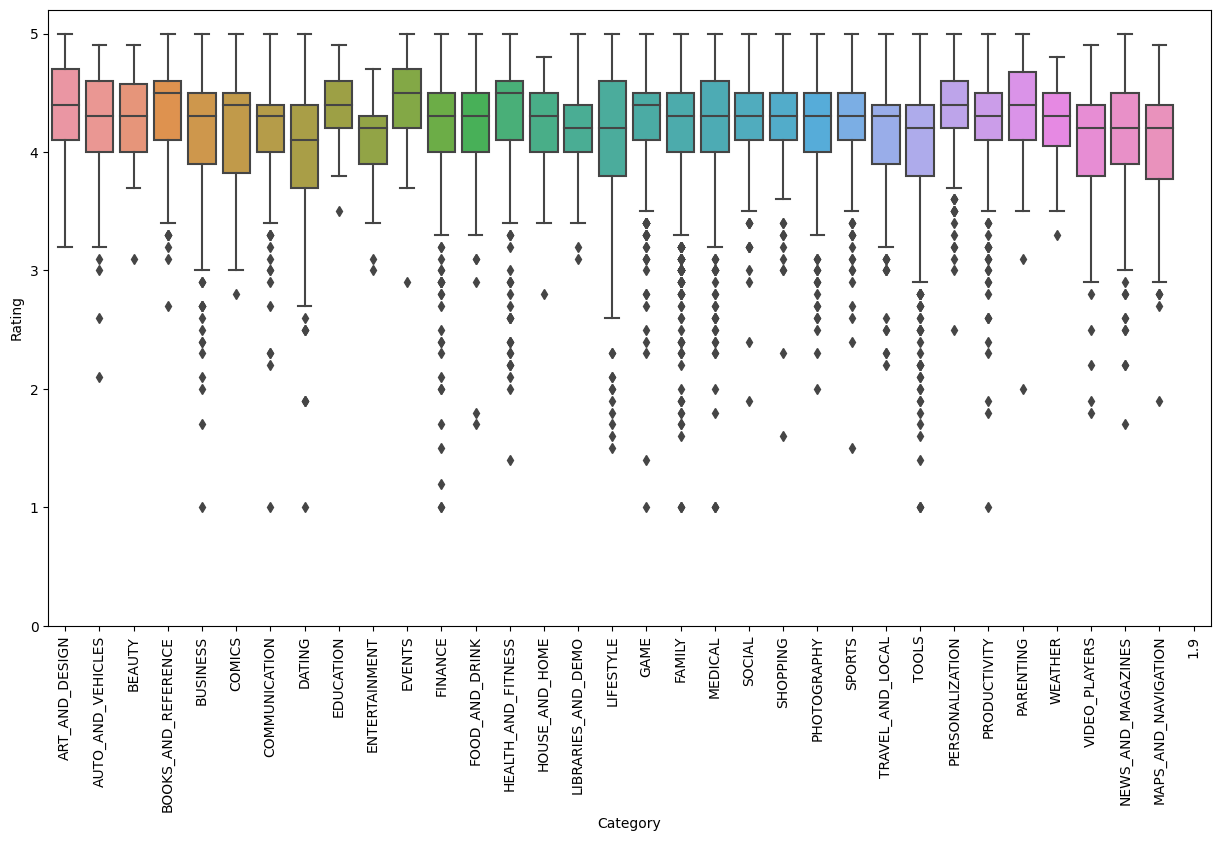

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=pf.Category,y=pf.Rating).set_ylim(0, 5.2)
plt.xticks(rotation = 90)
plt.show()

In [28]:
pf.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [29]:
pf.isnull().sum()  
# yes there are multiple missing value specially in user rating feature, this may lead wrong interpetaion and estimation.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [30]:
pf=pf.drop(pf.index[10472])
pf['Size']= pf['Size'].str.replace('M','000')
pf['Size']= pf['Size'].str.replace('k','')
pf['Size']= pf['Size'].replace('Varies with device',np.nan)
pf['Size']= pf['Size'].astype(float)

<Axes: xlabel='Rating', ylabel='Size'>

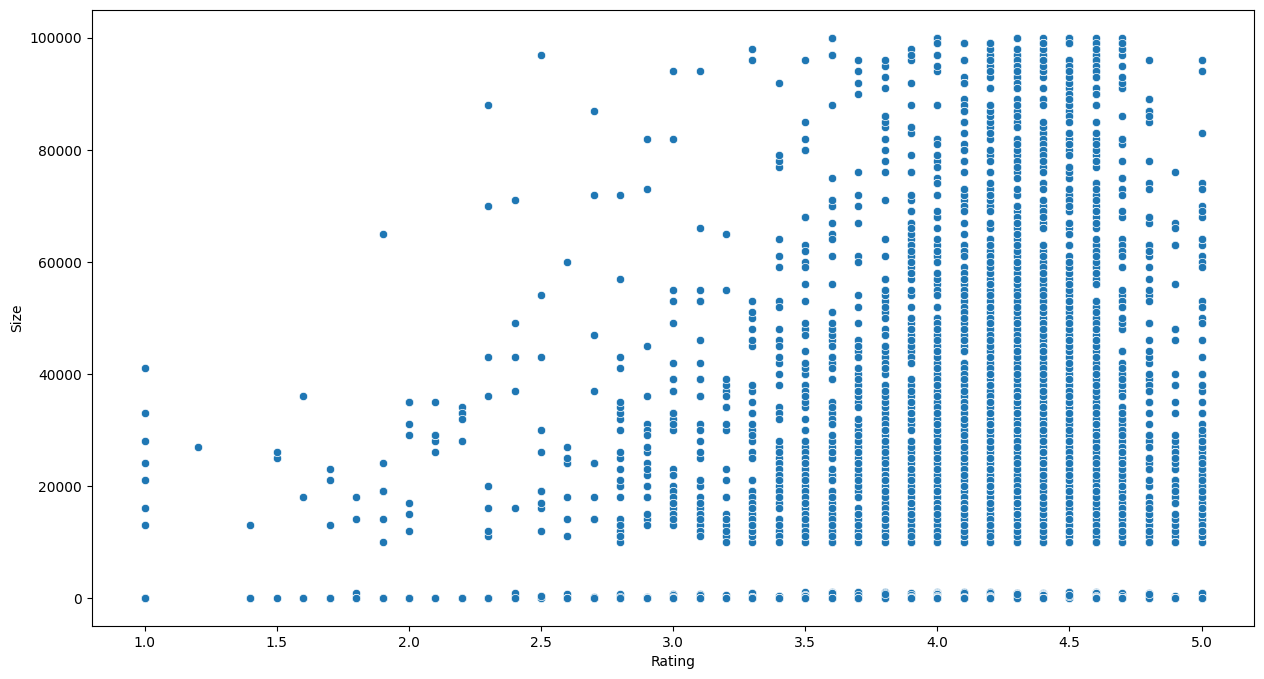

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=pf,y="Size",x="Rating")

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [32]:
chars_to_remove=[',','$']
cols_to_clean=['Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        pf[cols]=pf[cols].str.replace(item,'')

In [33]:
pf.Price = pf.Price.astype(float)
pf1 = pf.groupby('Category').Price.mean().reset_index()
pf1

,Category,Price
0,ART_AND_DESIGN,0.091846
1,AUTO_AND_VEHICLES,0.158471
2,BEAUTY,0.000000
3,BOOKS_AND_REFERENCE,0.518485
4,BUSINESS,0.402761
5,COMICS,0.000000
6,COMMUNICATION,0.214832
7,DATING,0.134316
8,EDUCATION,0.115128
9,ENTERTAINMENT,0.053557


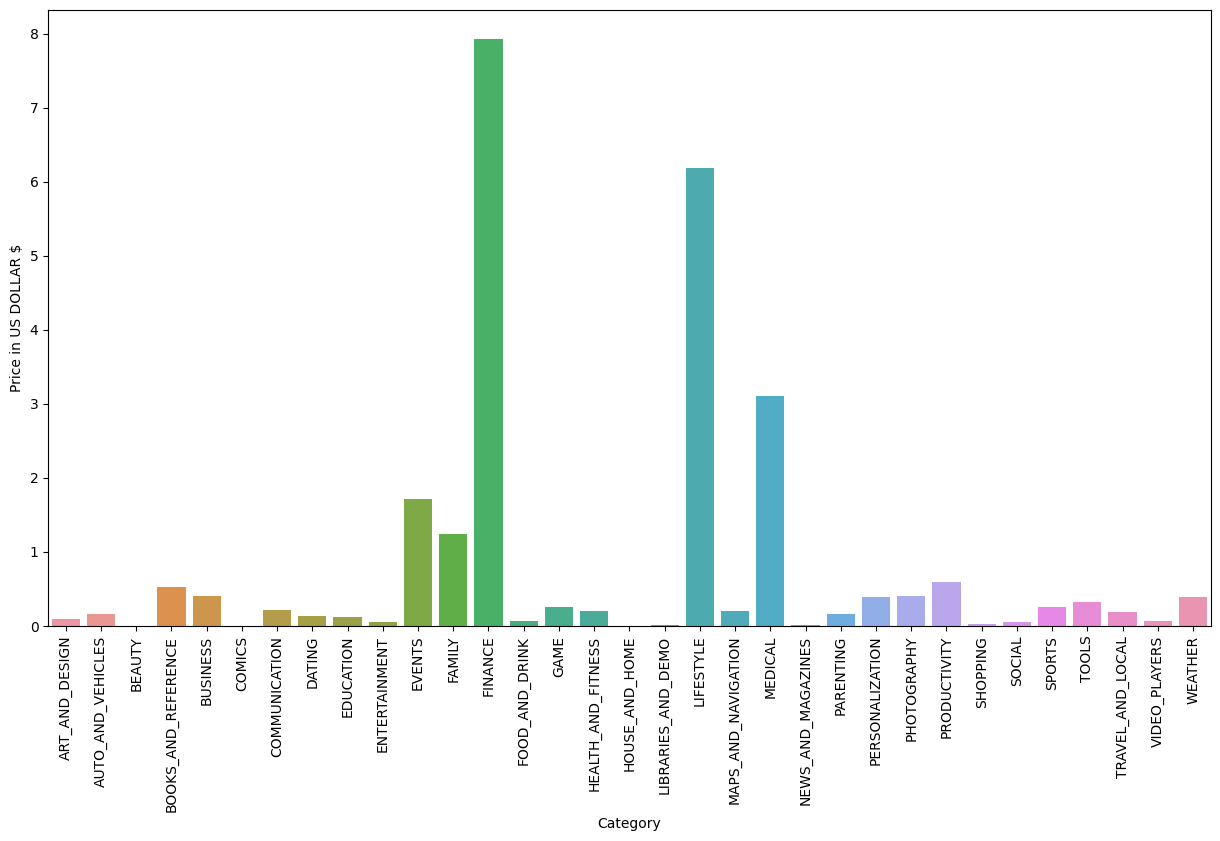

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(pf1,x= "Category",y="Price")
plt.xticks(rotation = 90)
plt.ylabel("Price in US DOLLAR $")
plt.show()

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [35]:
pf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [36]:
chars_to_remove=['+',',']
cols_to_clean=['Installs']
for item in chars_to_remove:
    for cols in cols_to_clean:
        pf[cols]=pf[cols].str.replace(item,'')

In [37]:
pf.Installs = pf.Installs.astype(int)

In [38]:
pf.groupby("App")['Installs'].sum().reset_index().nlargest(10,"Installs")

,App,Installs
8079,Subway Surfers,6000000000
4924,Google Drive,4000000000
4933,Google News,4000000000
4937,Google Photos,4000000000
5118,Hangouts,4000000000
5399,Instagram,4000000000
2364,Candy Crush Saga,3500000000
4869,Gmail,3000000000
4921,Google Chrome: Fast & Secure,3000000000
6050,Maps - Navigate & Explore,3000000000


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

In [39]:
pf.Reviews=pf.Reviews.astype(int)
pf.groupby("Category")['Installs'].sum().reset_index().nlargest(10,"Installs")   # these are most popular app category

,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915
11,FAMILY,10258263505
24,PHOTOGRAPHY,10088247655
21,NEWS_AND_MAGAZINES,7496317760
30,TRAVEL_AND_LOCAL,6868887146
31,VIDEO_PLAYERS,6222002720


### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?
Ans. For most successful app developer, we will use rating and reviews feature and we filter the data according to highest rating.

In [40]:
pf[pf.Rating > 4.5].groupby("App")['Reviews'].sum().reset_index().nlargest(12,"Reviews")

,App,Reviews
459,Clash of Clans,179558781
458,Clash Royale,92530298
1398,Sniper 3D Gun Shooter: Free Shooting Games - FPS,46022233
629,Duolingo: Learn Languages Free,44047832
462,Clean Master- Space Cleaner & Antivirus,42916526
623,Dream League Soccer 2018,29639915
1645,ZEDGE™ Ringtones & Wallpapers,25859549
1370,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
105,"AliExpress - Smarter Shopping, Better Living",23661715
1379,Shadow Fight 2,21960912


In [41]:
succes_app = list(pf[pf.Rating > 4.5].groupby("App")['Reviews'].sum().reset_index().nlargest(12,"Reviews").App)
pf3 = pf[pf.App.isin(succes_app)]
pf3 = pf3.drop_duplicates(subset=['App'],keep='last')
pf3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2004,Score! Hero,GAME,4.6,5419676,96000.0,100000000,Free,0.0,Everyone,Sports,"June 13, 2018",1.751,4.4 and up
3986,Clash of Clans,FAMILY,4.6,44881447,98000.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3987,Clash Royale,FAMILY,4.6,23125280,97000.0,100000000,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,500000000,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4031,ZEDGE™ Ringtones & Wallpapers,PERSONALIZATION,4.6,6459626,NaN,100000000,Free,0.0,Teen,Personalization,"July 19, 2018",Varies with device,Varies with device
4051,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7657490,NaN,100000000,Free,0.0,Mature 17+,Action,"August 2, 2018",Varies with device,Varies with device
4056,Dream League Soccer 2018,SPORTS,4.6,9873470,74000.0,100000000,Free,0.0,Everyone,Sports,"July 16, 2018",5.064,4.4 and up
4099,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5911055,NaN,100000000,Free,0.0,Teen,Shopping,"August 1, 2018",Varies with device,Varies with device
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.6,16771865,NaN,100000000,Free,0.0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device


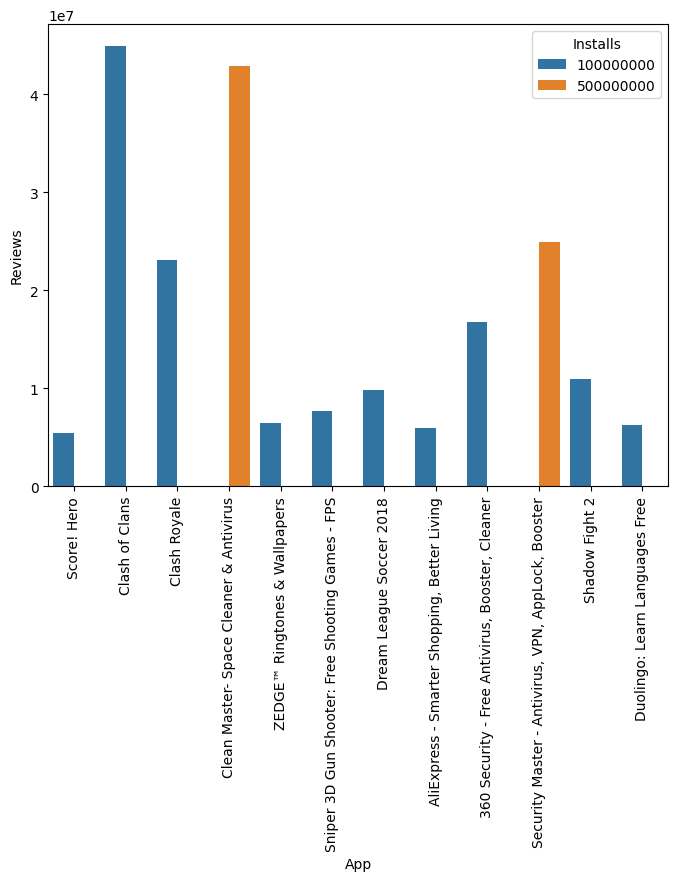

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(pf3,x="App",y="Reviews",hue="Installs")
plt.xticks(rotation=90)
plt.show()

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [43]:
pf['Last Updated']=pd.to_datetime(pf['Last Updated'])
pf['Day']=pf['Last Updated'].dt.day
pf['Month']=pf['Last Updated'].dt.month
pf['Year']=pf['Last Updated'].dt.year

In [45]:
pf.Year.value_counts()

Year
2018    7349
2017    1867
2016     804
2015     459
2014     209
2013     110
2012      26
2011      15
2010       1
Name: count, dtype: int64

In [46]:
x = pf.groupby("Category").Month.mean().to_dict()
x

{'ART_AND_DESIGN': 5.938461538461539,
 'AUTO_AND_VEHICLES': 6.4941176470588236,
 'BEAUTY': 6.0754716981132075,
 'BOOKS_AND_REFERENCE': 6.298701298701299,
 'BUSINESS': 6.215217391304348,
 'COMICS': 6.766666666666667,
 'COMMUNICATION': 6.555555555555555,
 'DATING': 6.8076923076923075,
 'EDUCATION': 7.160256410256411,
 'ENTERTAINMENT': 6.469798657718121,
 'EVENTS': 7.375,
 'FAMILY': 6.295131845841785,
 'FINANCE': 6.180327868852459,
 'FOOD_AND_DRINK': 6.425196850393701,
 'GAME': 6.561188811188811,
 'HEALTH_AND_FITNESS': 6.519061583577713,
 'HOUSE_AND_HOME': 6.636363636363637,
 'LIBRARIES_AND_DEMO': 4.764705882352941,
 'LIFESTYLE': 6.290575916230367,
 'MAPS_AND_NAVIGATION': 6.700729927007299,
 'MEDICAL': 6.3218142548596115,
 'NEWS_AND_MAGAZINES': 6.392226148409894,
 'PARENTING': 6.133333333333334,
 'PERSONALIZATION': 6.285714285714286,
 'PHOTOGRAPHY': 6.405970149253731,
 'PRODUCTIVITY': 6.688679245283019,
 'SHOPPING': 6.792307692307692,
 'SOCIAL': 6.684745762711865,
 'SPORTS': 6.30208333333

In [47]:
pf["Avg_Update_Month"] = pf["Category"].map(x)

In [48]:
pf["Avg_Update_Month"] = (pf["Avg_Update_Month"]+[0.5]).astype(int)

##### Best time of launch depend on a serval factors. Like App Store Updates: Be aware of Google Play Store update schedules, as these updates may affect app rankings. Launching shortly after an update when the app rankings are more stable could be advantageous. So Again category wise best time to launch a app in month of:

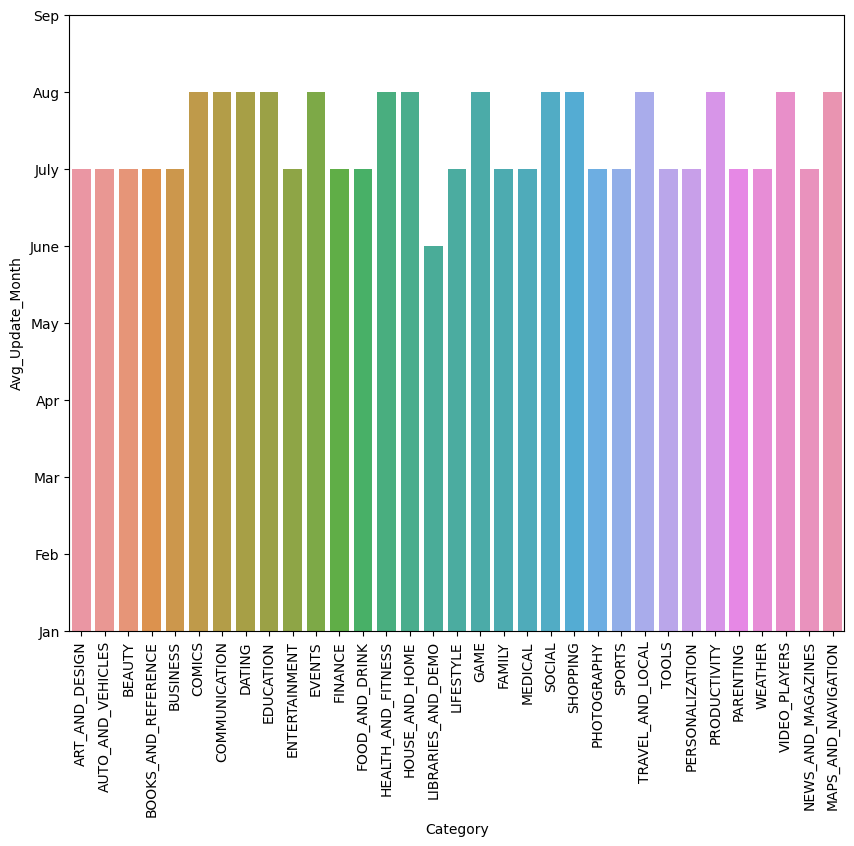

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(pf,x="Category",y= "Avg_Update_Month")
plt.xticks(rotation=90)
plt.yticks(range(0,9),["Jan",'Feb','Mar','Apr',"May","June","July","Aug","Sep"])
plt.show()

### Overalll best time to launch a app in moth of Sepetember because most of categories update his app in month of last of August.